# La Rovere Francesco - Physics Of Data - 2164968

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


colors = ['#21918c', '#b5367a', '#d55e00', '#4b5d67', '#b58900']

In [3]:
class AnalysisCSV:

   def __init__(self, fileName, N = 10):
      
      self.dDF = pd.read_csv(fileName['Data'])
      self.rDF = pd.read_csv(fileName['Rewards'])

      #To compute survival probability
      self.rDF['NotCrashed'] = ~self.rDF['Crashed']

      self.grDF = self.rDF.groupby(self.rDF.index // N).mean()

In [15]:
manualFiles = {
   'Data': 'Data/ManualControlActions.csv',
   'Rewards': 'Data/ManualControlRewards.csv'
}

baselineFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/BaselineControlRewards.csv'
}

DQNFiles = {
   'Data': f'Data/BaselineControlActions.csv',
   'Rewards': f'Data/DQN_agentControlRewards.csv'
}

#ManualControl = AnalysisCSV(manualFiles)
Baseline = AnalysisCSV(baselineFiles, N = 40)
Manual = AnalysisCSV(manualFiles, N = 10)
DQN = AnalysisCSV(DQNFiles, N = 40)

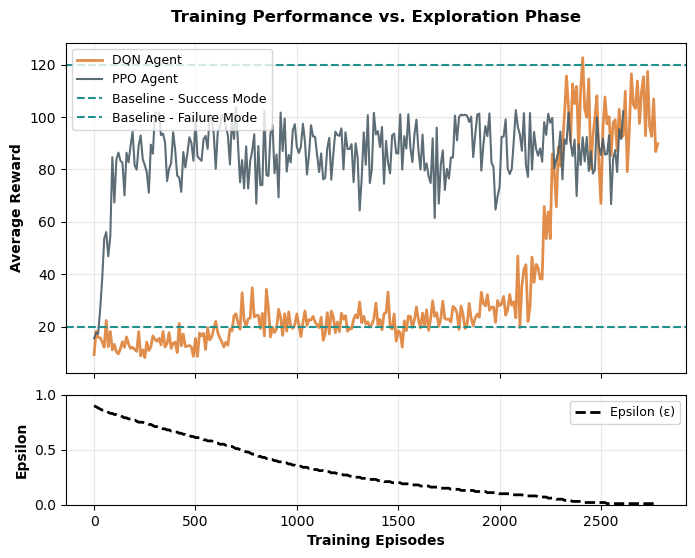

In [ ]:
tDF = pd.read_csv('DQN/DDQNTrainingData.csv')
ppoDF = pd.read_csv('PPO/PPOtrainingData.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1) 

episodes = tDF['Episode'] 

# Plot DQN

ax1.plot(episodes, tDF['Avg Reward'], color='#d55e00', alpha = 0.7, linewidth=2, label='DQN Agent')

# Plot PPO
ax1.plot(ppoDF['Episode'], ppoDF['Avg Reward'], color='#4b5d67', alpha=0.9, label = 'PPO Agent')

# Plot Baseline
ax1.axhline(120, color='#21918c', linestyle='--', linewidth=1.5, label='Baseline - Success Mode')
ax1.axhline(20, color='#21918c', linestyle='--', linewidth=1.5, label='Baseline - Failure Mode')

ax1.set_ylabel('Average Reward', fontweight='bold')
ax1.set_title('Training Performance vs. Exploration Phase', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# BOTTOM PLOT
ax2.plot(episodes, tDF['Eps'], color='black', linestyle='--', linewidth=2, label='Epsilon (\u03B5)')

ax2.set_xlabel('Training Episodes', fontweight='bold')
ax2.set_ylabel('Epsilon', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

# Save as PDF for your LaTeX document
# plt.savefig('Training_Dynamics_Stacked.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()

KeyError: 'SuccessRate'

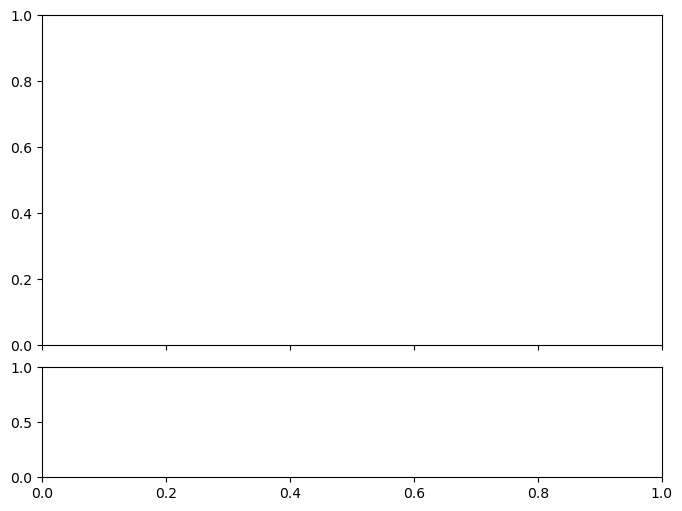

In [17]:
tDF = pd.read_csv('DQN/DDQNTrainingData.csv')
ppoDF = pd.read_csv('PPO/PPOtrainingData.csv')

SR_baseline = (Baseline.rDF['Crashed'].mean(), Baseline.rDF['Crashed'].std()/len(Baseline.rDF))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1) 

episodes = tDF['Episode'] 

# Plot DQN
ax1.plot(episodes, tDF['SuccessRate'], color='#d55e00', alpha = 0.7, linewidth=2, label='DQN')

# Plot PPO
ax1.plot(ppoDF['Episode'], ppoDF['SuccessRate'], color='#4b5d67', alpha=0.9, label = 'PPO')

# Plot Baseline
ax1.axhline(SR_baseline[0], color='#21918c', linestyle='--', linewidth=1.5, label='Baseline')

ax1.set_ylabel('Average Reward', fontweight='bold')
ax1.set_title('Training Performance vs. Exploration Phase', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# BOTTOM PLOT
ax2.plot(episodes, tDF['Eps'], color='black', linestyle='--', linewidth=2, label='Epsilon (\u03B5)')

ax2.set_xlabel('Training Episodes', fontweight='bold')
ax2.set_ylabel('Epsilon', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

# Save as PDF for your LaTeX document
# plt.savefig('Training_Dynamics_Stacked.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()

Text(0, 0.5, 'Survival probability')

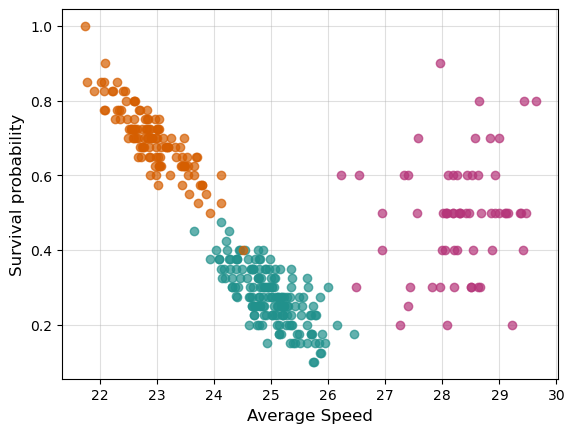

In [48]:
plt.scatter(Baseline.grDF['AvgSpeed'], Baseline.grDF['NotCrashed'], 
            label = 'Baseline agent', alpha=0.7,
            zorder = 100, color = '#21918c')

plt.scatter(Manual.grDF['AvgSpeed'], Manual.grDF['NotCrashed'], 
            label = 'Manual agent', alpha=0.7,
            zorder = 100, color = '#b5367a')

plt.scatter(DQN.grDF['AvgSpeed'], DQN.grDF['NotCrashed'], 
            label = 'DQN agent', alpha=0.7,
            zorder = 100, color = '#d55e00')

plt.grid(True, alpha = 0.4)

plt.xlabel("Average Speed", fontsize = 12)
plt.ylabel("Survival probability", fontsize = 12)

#plt.legend(fontsize = 12, loc = 'lower left')

#plt.savefig("SpeedVsSurvRate.pdf")

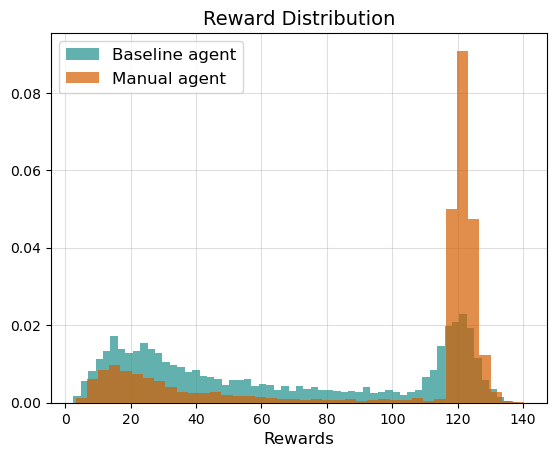

In [39]:
plt.hist(Baseline.rDF['Rewards'], density = True, 
         label = 'Baseline agent', bins = 60,
         alpha = 0.7,
         zorder = 100, color='#21918c')

# plt.hist(Manual.rDF['Rewards'], density = True, 
#          label = 'Manual agent', bins = 30,
#          alpha = 0.7,
#          zorder = 100, color='#b5367a')

plt.hist(DQN.rDF['Rewards'], density = True, 
         label = 'Manual agent', bins = 40,
         alpha = 0.7,
         zorder = 100, color='#d55e00')

plt.grid(True, alpha = 0.4)
plt.xlabel("Rewards", fontsize = 12)
plt.title("Reward Distribution", fontsize = 14)

plt.legend(fontsize = 12)

#plt.savefig("RewardDist.pdf")
plt.show()

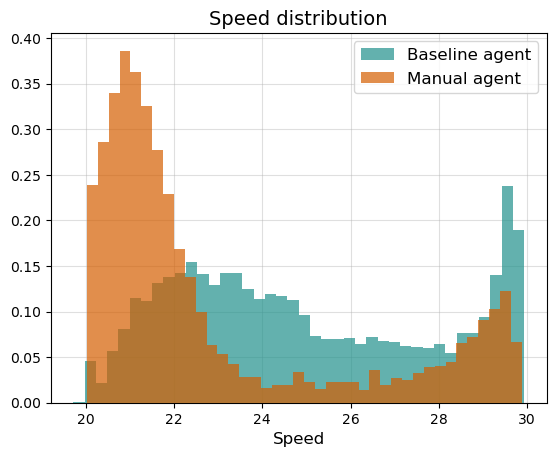

In [40]:
plt.hist(Baseline.rDF['AvgSpeed'], label = 'Baseline agent', density = True,
         zorder = 100, alpha = 0.7, bins = 40,
         color = '#21918c')
# plt.hist(Manual.rDF['AvgSpeed'], label = 'Manual agent', density = True,
#          zorder = 100, alpha = 0.7, color = '#b5367a')

plt.hist(DQN.rDF['AvgSpeed'], label = 'Manual agent', density = True, bins = 40,
         zorder = 100, alpha = 0.7, color = '#d55e00')

plt.grid(True, alpha = 0.4)
plt.xlabel("Speed", fontsize = 12)
plt.title("Speed distribution", fontsize = 14)

plt.legend(fontsize = 12)
#plt.savefig("SpeedDist.pdf")

plt.show()

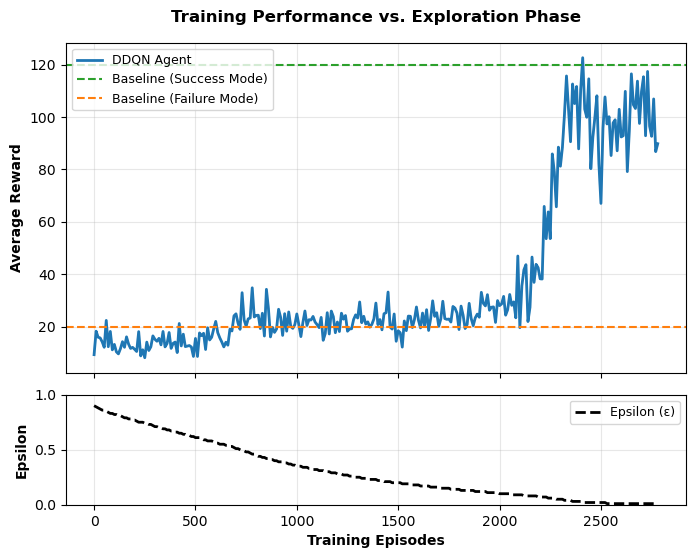

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


tDF = pd.read_csv('DQN/DDQNTrainingData.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace=0.1) 

episodes = tDF['Episode'] 

# Plot DQN
ax1.plot(episodes, tDF['Avg Reward'], color='tab:blue', alpha=0.2)
ax1.plot(episodes, tDF['Avg Reward'], color='tab:blue', linewidth=2, label='DDQN Agent')

# Plot PPO
# ax1.plot(episodes, ppoDF['Avg Reward'], color='tab:red', alpha=0.2)
# ax1.plot(episodes, smooth(ppoDF['Avg Reward']), color='tab:red', linewidth=2, label='PPO Agent')

# Plot Baseline
ax1.axhline(120, color='tab:green', linestyle='--', linewidth=1.5, label='Baseline (Success Mode)')
ax1.axhline(20, color='tab:orange', linestyle='--', linewidth=1.5, label='Baseline (Failure Mode)')

ax1.set_ylabel('Average Reward', fontweight='bold')
ax1.set_title('Training Performance vs. Exploration Phase', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# BOTTOM PLOT
ax2.plot(episodes, tDF['Eps'], color='black', linestyle='--', linewidth=2, label='Epsilon (\u03B5)')

ax2.set_xlabel('Training Episodes', fontweight='bold')
ax2.set_ylabel('Epsilon', fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)
ax2.legend(loc='upper right', fontsize=9)

# Save as PDF for your LaTeX document
# plt.savefig('Training_Dynamics_Stacked.pdf', format='pdf', bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 1. Load your raw baseline episode rewards 
# (e.g., a list of 100 or 1000 evaluation scores)
# baseline_rewards = pd.read_csv('BaselineControlRewards.csv')['Rewards'].values
baseline_rewards = np.array(Baseline.rDF['Rewards']) # Replace with your actual data

# 2. Reshape the data for scikit-learn (it expects a 2D column vector)
rewards_reshaped = baseline_rewards.reshape(-1, 1)

# 3. Fit the 2-Component GMM
# n_components=2 tells the math to look for exactly two peaks
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(rewards_reshaped)

# 4. Extract the exact mathematical centers of those two peaks
modes = gmm.means_.flatten()

# Sort them so you know which is the crash and which is the success
failure_mode = np.min(modes)
success_mode = np.max(modes)

print(f"Calculated Failure Regime (Lower Dashed Line): {failure_mode:.2f}")
print(f"Calculated Success Regime (Upper Dashed Line): {success_mode:.2f}")

Calculated Failure Regime (Lower Dashed Line): 39.03
Calculated Success Regime (Upper Dashed Line): 119.22


In [37]:
import numpy as np

# Assuming 'baseline_rewards' is your loaded numpy array of baseline evaluation baseline_rewards
valley_threshold = 80

# Split the data into the two distinct behavioral regimes
failure_regime = baseline_rewards[baseline_rewards <= valley_threshold]
success_regime = baseline_rewards[baseline_rewards > valley_threshold]

# Use Median instead of Mean to ignore the skewness of the tail!
failure_mode = np.median(failure_regime)
success_mode = np.median(success_regime)

print(f"Failure Regime Threshold: {failure_mode:.2f}")
print(f"Success Regime Threshold: {success_mode:.2f}")

Failure Regime Threshold: 28.66
Success Regime Threshold: 118.17


In [44]:
Baseline.rDF['Crashed'].std()

np.float64(0.447219406094818)